<a href="https://colab.research.google.com/github/srinivas3492/git-learning/blob/main/NIFTY_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install -q kaggle

In [4]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srinivasgullipalli","key":"ef82796987b6e21e79845aae5547d666"}'}

In [5]:
!mkdir ~/.kaggle

In [11]:
!cp kaggle.json ~/.kaggle

In [12]:
# permission for the json file to act
! chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
nkitgupta/jigsaw-regression-based-data                      Jigsaw Regression Based Data                         3GB  2022-02-05 20:51:56            817  
prasertk/netflix-subscription-price-in-different-countries  Netflix subscription fee in different countries      3KB  2022-01-15 07:06:09           2228  
yasserh/wine-quality-dataset                                Wine Quality Dataset                                21KB  2022-01-15 19:15:11           1969  
yamqwe/netflix-showse                                       Netflix Shows                                       11KB  2022-01-23 00:03:01           1305  
sanjeetsinghnaik/top-1000-highest-grossing-movies           Top 1000 H

In [14]:
!kaggle datasets download -d iamsouravbanerjee/nifty50-stocks-dataset

  0% 0.00/2.64k [00:00<?, ?B/s]
100% 2.64k/2.64k [00:00<00:00, 4.97MB/s]


In [15]:
!unzip nifty50-stocks-dataset.zip

Archive:  nifty50-stocks-dataset.zip
  inflating: National_Stock_Exchange_of_India_Ltd.csv  


In [16]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.tools as tls
%matplotlib inline

In [19]:
nifty_50 =pd.read_csv("National_Stock_Exchange_of_India_Ltd.csv")

In [22]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     object 
 2   High             50 non-null     object 
 3   Low              50 non-null     object 
 4   LTP              50 non-null     object 
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     object 
 9   52w H            50 non-null     object 
 10  52w L            50 non-null     object 
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float64(5), object(8)
memory usage: 5.2+ KB


In [23]:
nifty_50.head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
0,ADANIPORTS,750,766,713.25,715,-47.45,-6.22,72.20,532.63,901,384.4,79.22,-4.65
1,ASIANPAINT,"3,101.00","3,167.35","3,091.00","3,138.00",-6.25,-0.20,10.29,322.53,"3,505.00","2,117.15",45.66,5.66
2,AXISBANK,669,674.9,660.45,661,-18.90,-2.78,102.53,684,866.9,568.4,10.19,-21.49
3,BAJAJ-AUTO,"3,370.00","3,383.50","3,320.00","3,335.00",-56.70,-1.67,3.42,114.59,"4,361.40","3,041.00",9.30,-12.05
4,BAJAJFINSV,"17,200.00","17,237.20","16,610.00","16,684.00",-684.85,-3.94,3.42,576.79,"19,325.00","8,273.70",91.38,-9.10


**Lets underastand the data,We have these colums**

symobol = stocks names of nifty 50

Open=Open price for current day

High=Price made high for current day

Low=Price made low for current day

Chng=Change in rupees

% Chng=Percentage of change from previous day close

Volume (lacs)=Traded volume

Turnover (crs.)=Turnover

52w H=Stock 52 week high price

52w L=Stock 52 week high price

365 d % chng=Stock price percentage change from one year

30 d % chng=Stock price percentage change from last 30days

In [24]:
#All these columns need to be numerical except Symbol-Lets convert to float
col = nifty_50.columns
for i in col:
    if i!='Symbol':
        if nifty_50[i].dtype =='object':
            nifty_50[i] = nifty_50[i].str.replace(',','').astype('float32')

In [25]:
nifty_50.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Symbol           50 non-null     object 
 1   Open             50 non-null     float32
 2   High             50 non-null     float32
 3   Low              50 non-null     float32
 4   LTP              50 non-null     float32
 5   Chng             50 non-null     float64
 6   % Chng           50 non-null     float64
 7   Volume (lacs)    50 non-null     float64
 8   Turnover (crs.)  50 non-null     float32
 9   52w H            50 non-null     float32
 10  52w L            50 non-null     float32
 11  365 d % chng     50 non-null     float64
 12  30 d % chng      50 non-null     float64
dtypes: float32(7), float64(5), object(1)
memory usage: 3.8+ KB


In [26]:
nifty_50.isnull().sum()

Symbol             0
Open               0
High               0
Low                0
LTP                0
Chng               0
% Chng             0
Volume (lacs)      0
Turnover (crs.)    0
52w H              0
52w L              0
365 d % chng       0
30 d % chng        0
dtype: int64

In [27]:
new=nifty_50.sort_values('365 d % chng',ascending = False).head(10)
new1=new[['Symbol','365 d % chng']]

Text(0.5, 1.0, 'Top 10 Gainers from last year')

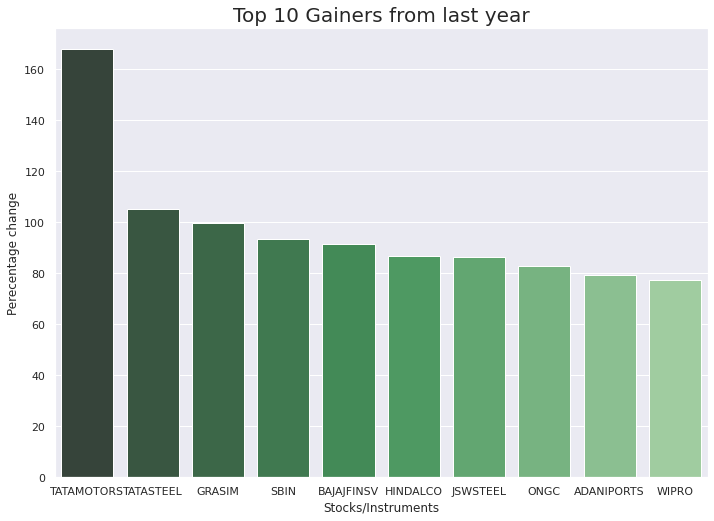

In [28]:
d=new1.groupby("365 d % chng").size()
sns.set(rc={'figure.figsize':(11.7,8.27)})
pal = sns.color_palette("Greens_d",len(d))
rank = new1['365 d % chng'].argsort().argsort()
sns.barplot(x=new1['Symbol'], y=new1['365 d % chng'],palette=np.array(pal[::1])[rank])
plt.xlabel("Stocks/Instruments")
plt.ylabel("Perecentage change")
plt.title("Top 10 Gainers from last year",fontsize=20)

TATAMOTORS is the top gainer from last year with 167.95%

**Which stocks doubled investors money in a year?**

In [29]:
nifty_50[nifty_50['365 d % chng']>100]

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
42,TATAMOTORS,486.000000,486.75,458.00,459.399994,-33.35,-6.77,517.88,2430.360107,536.700012,156.699997,167.95,-9.68
43,TATASTEEL,1157.900024,1159.50,1106.25,1110.250000,-63.40,-5.40,106.46,1200.790039,1534.500000,539.500000,105.13,-17.37


**Top losers from last one year**

In [30]:
top_losers_year=nifty_50[nifty_50['365 d % chng']<0]
df=top_losers_year.sort_values('365 d % chng')
f=df[['Symbol','365 d % chng']]
f

,Symbol,365 d % chng
19,HEROMOTOCO,-16.02
13,EICHERMOT,-5.95
7,BPCL,-1.22
12,DRREDDY,-1.17


Text(0.5, 1.0, 'Top losers from last year')

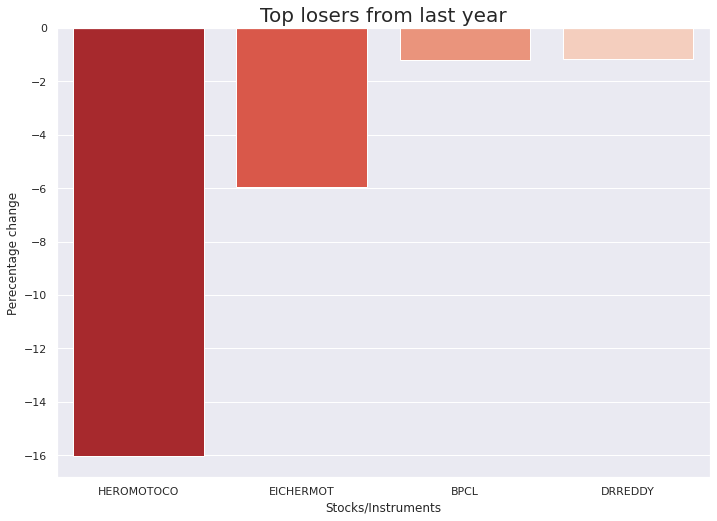

In [31]:
f1=f.groupby("365 d % chng").size()
pal1=sns.color_palette("Reds",len(f1))
sns.barplot(x=f['Symbol'], y=f['365 d % chng'],palette=np.array(pal1[::-1]))
plt.xlabel("Stocks/Instruments")
plt.ylabel("Perecentage change")
plt.title("Top losers from last year",fontsize=20)

HEROMOTOCOP is the top loser with -16%


Only four stocks out of 50 stocks are in negative


Both Top gainer and Top loser are from same sector(Automotive sector)-Intresting.Sometimes,It purely depends on fundamentals and technicals of specific stock.

**Top 5 gainers in a month**

In [32]:
t30=nifty_50[nifty_50['30 d % chng']>0].head(5)
t_30=t30.sort_values('30 d % chng',ascending=False)
t_30[['Symbol','30 d % chng']].head(5)

,Symbol,30 d % chng
9,CIPLA,6.34
6,BHARTIARTL,5.70
1,ASIANPAINT,5.66
12,DRREDDY,1.80
32,NESTLEIND,0.17


Text(0.5, 1.0, 'Top 5 gainers from one month')

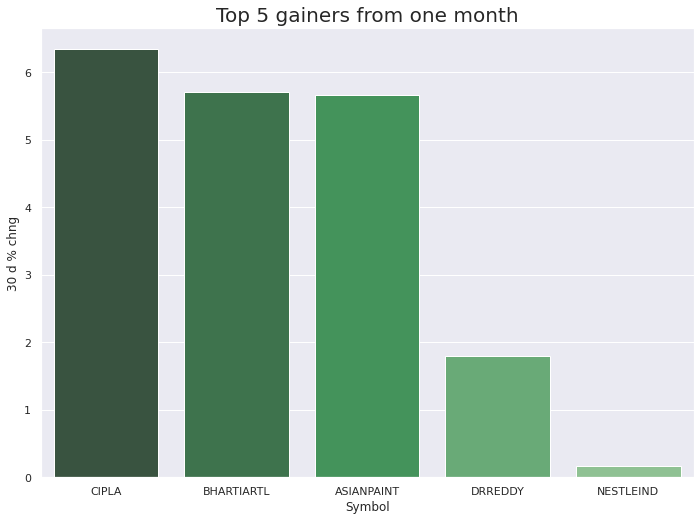

In [33]:
d1=t_30.groupby('30 d % chng').size()
pal2=sns.color_palette("Greens_d",len(d1))
sns.barplot(x=t_30['Symbol'],y=t_30['30 d % chng'],palette=np.array(pal2[::-1]))
plt.title("Top 5 gainers from one month",fontsize=20)

**Top 5 loser in a month**

In [34]:
t_30l=nifty_50[nifty_50['30 d % chng']<0].head(5)
t_1=t_30l.sort_values('30 d % chng')
t_1[['Symbol','30 d % chng']].head(5)

,Symbol,30 d % chng
2,AXISBANK,-21.49
5,BAJFINANCE,-13.69
3,BAJAJ-AUTO,-12.05
4,BAJAJFINSV,-9.10
0,ADANIPORTS,-4.65


Text(0.5, 1.0, 'Top 5 losers from one month')

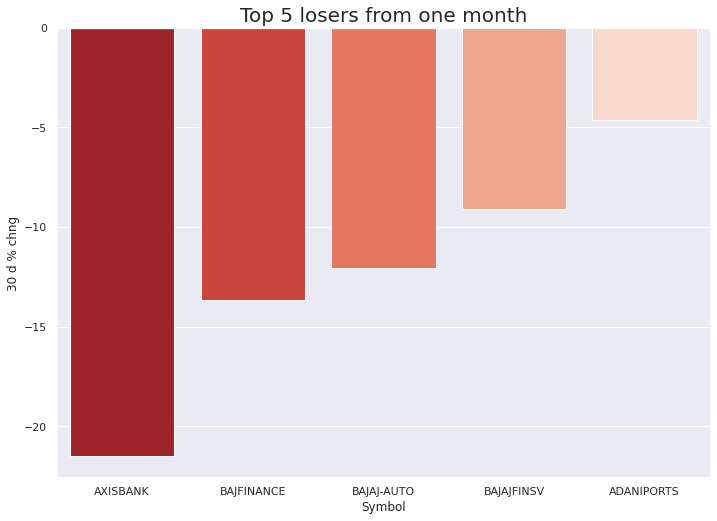

In [35]:
l=t_1.groupby('30 d % chng').size()
pal3=sns.color_palette('Reds',len(l))
sns.barplot(x=t_1['Symbol'],y=t_1['30 d % chng'],palette=np.array(pal3[::-1]))
plt.title("Top 5 losers from one month",fontsize=20)

In [36]:
nifty_50.sort_values('Turnover (crs.)',ascending = False).head()

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
42,TATAMOTORS,486.000000,486.750000,458.000000,459.399994,-33.35,-6.77,517.88,2430.360107,536.700012,156.699997,167.95,-9.68
36,RELIANCE,2467.800049,2477.600098,2401.500000,2405.100098,-87.85,-3.52,72.75,1770.189941,2751.350098,1830.000000,23.48,-9.62
17,HDFCBANK,1500.000000,1506.699951,1485.000000,1489.500000,-36.45,-2.39,93.12,1394.099976,1725.000000,1342.000000,6.18,-9.88
22,ICICIBANK,739.000000,742.049988,718.599976,720.450012,-30.60,-4.07,189.88,1385.859985,867.000000,465.799988,52.41,-13.14
9,CIPLA,892.000000,976.049988,890.650024,965.000000,65.05,7.23,144.59,1380.900024,1005.000000,726.500000,31.89,6.34


Text(0.5, 1.0, 'Turnover in crs of stocks')

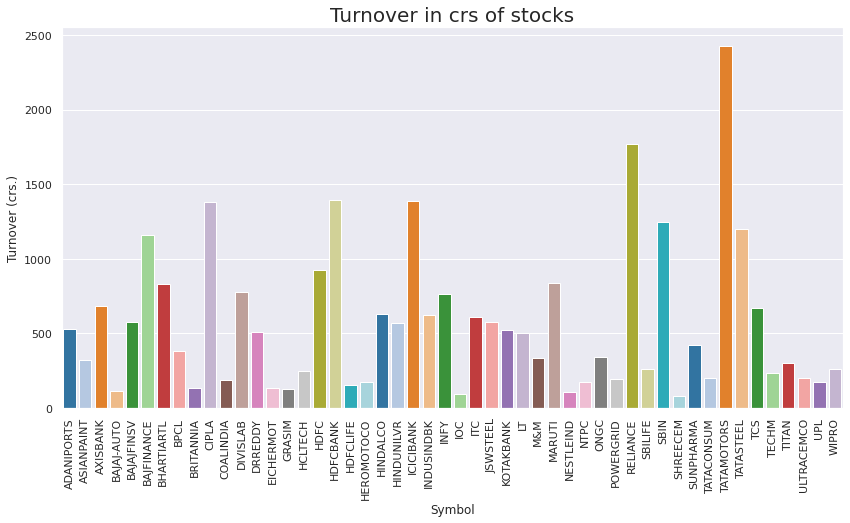

In [37]:
fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(x=nifty_50['Symbol'], y=nifty_50['Turnover (crs.)'], palette='tab20')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Turnover in crs of stocks",fontsize=20)

**Top 10 stocks in which highest volume traded**

In [38]:
nifty_50.sort_values('Volume (lacs)',ascending = False).head(10)

,Symbol,Open,High,Low,LTP,Chng,% Chng,Volume (lacs),Turnover (crs.),52w H,52w L,365 d % chng,30 d % chng
42,TATAMOTORS,486.000000,486.750000,458.000000,459.399994,-33.35,-6.77,517.88,2430.360107,536.700012,156.699997,167.95,-9.68
26,ITC,228.899994,230.050003,223.100006,223.600006,-7.70,-3.33,270.27,610.539978,265.299988,192.399994,15.35,-5.53
38,SBIN,486.250000,487.899994,467.100006,470.000000,-20.55,-4.19,263.06,1249.550049,542.299988,240.149994,93.42,-8.30
34,ONGC,152.250000,152.250000,146.250000,147.750000,-7.35,-4.74,231.36,344.329987,172.750000,77.050003,82.86,-9.41
22,ICICIBANK,739.000000,742.049988,718.599976,720.450012,-30.60,-4.07,189.88,1385.859985,867.000000,465.799988,52.41,-13.14
20,HINDALCO,441.799988,442.700012,414.700012,417.700012,-29.35,-6.57,148.26,631.929993,551.849976,220.350006,86.93,-14.06
9,CIPLA,892.000000,976.049988,890.650024,965.000000,65.05,7.23,144.59,1380.900024,1005.000000,726.500000,31.89,6.34
33,NTPC,133.199997,134.050003,128.000000,128.649994,-6.55,-4.84,133.24,173.940002,152.100006,88.150002,36.93,-10.16
10,COALINDIA,157.750000,159.399994,155.350006,155.899994,-2.65,-1.67,118.30,185.500000,203.800003,123.250000,25.78,-10.94
6,BHARTIARTL,763.000000,763.000000,733.099976,735.849976,-29.30,-3.83,111.43,830.059998,781.799988,454.109985,58.55,5.70


Text(0.5, 1.0, 'Volume tarded in each stock')

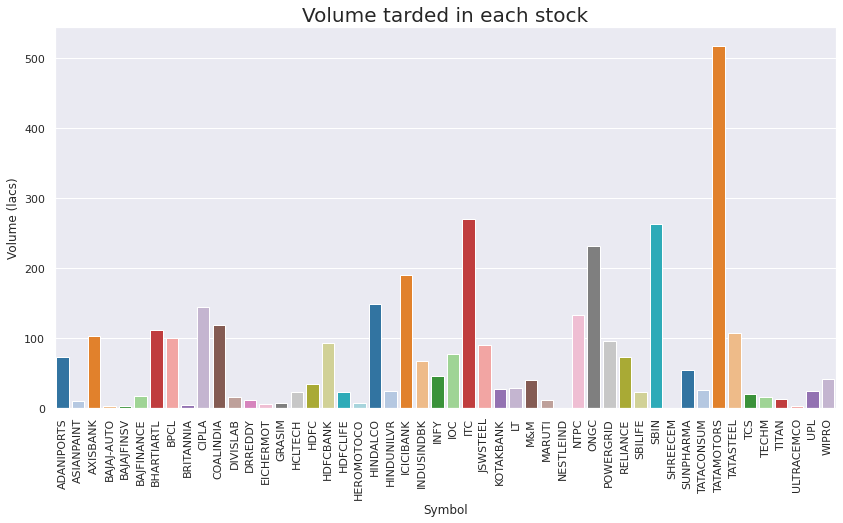

In [39]:
fig,ax=plt.subplots(figsize=(14,7))
sns.barplot(x=nifty_50['Symbol'], y=nifty_50['Volume (lacs)'], palette='tab20')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Volume tarded in each stock",fontsize=20)

**Concluison**

*1.TATA MOTORS is a top gainer from last year with gaining percentage of 165


2)HEROMOTOCOP is a top loser from last year with losing percenatge of 16


By looking above,It is clear that-Even both are from Automotive sector.But one is top gainer and another top loser. It shows that,Stock price change is effected by news,it's fundamentals and technicals. Even when the whole sector is underperforming-There wil be stocks which are opposite to this and will give some considerable returns.


3)TATAMOTORS AND TATASTEEL doubled investors money in a year


4)Out of 50 stocks only 4 stocks has given losses to investors


5)Over the longperiod-Nifty will be giving some good returns*